# Final Notebook

![recreation](https://media.giphy.com/media/3o6Ztmk2wCUMqQ4sE0/giphy.gif)

## In order to figure out the best neighborhood in Pittsburgh, we looked for the best neighborhood for outdoor and indoor recreation. We utilzed three different datasets in order to find this out. We used a dataset that contains information on all of the courts and rinks in Pittsburgh. The second data set has information on all of the public pools in Pittsburgh. The last one has all of the playgrounds in the city. 

To come to a conclusion on which neighborhood was the best, we all came up with the top neighborhood from our data set. We chose the neighborhood with either the most courts and rinks, pools, or playgrounds. 

### Lucy's Notebook

Best neighborhood for courts and rinks
https://data.wprdc.org/datastore/dump/a5b71bfa-840c-4c86-8f43-07a9ae854227


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import geopandas
%matplotlib inline

data = pd.read_csv("CourtsAndRinks.csv")

# count number of courts and rinks in each neighborhood
data_neighborhood = data.groupby("neighborhood")['id'].count()

data_neighborhood

neighborhood
Allegheny Center       9
Allentown              1
Banksville             3
Bedford Dwellings      2
Beechview              7
                      ..
Terrace Village        5
Troy Hill              8
Upper Hill             1
Upper Lawrenceville    2
West End               2
Name: id, Length: 63, dtype: int64

In [3]:
# find out how many different types of courts there are
different_courts = data.groupby("type")['id'].count()
different_courts = different_courts.sort_values()
different_courts

type
Horseshoe Pit         2
Lawn Bowling          2
Dek Hockey            5
Volleyball            5
General Sports        6
Bocce                 8
Street Hockey         8
Pickleball           12
Hockey               14
Basketball (Half)    23
Tennis               73
Basketball (Full)    88
Name: id, dtype: int64

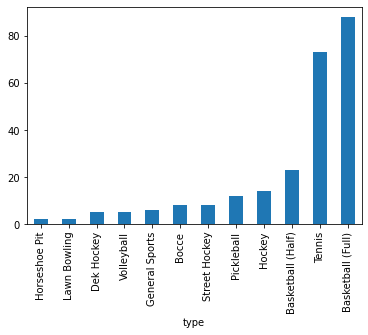

In [4]:
different_courts.plot.bar()

In [7]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
# read in the shapefile

In [8]:
courtsandrinks_map = neighborhoods.merge(data_neighborhood, how='left', left_on='hood', right_index=True)
# look at the head to confirm it merged correctly                                              

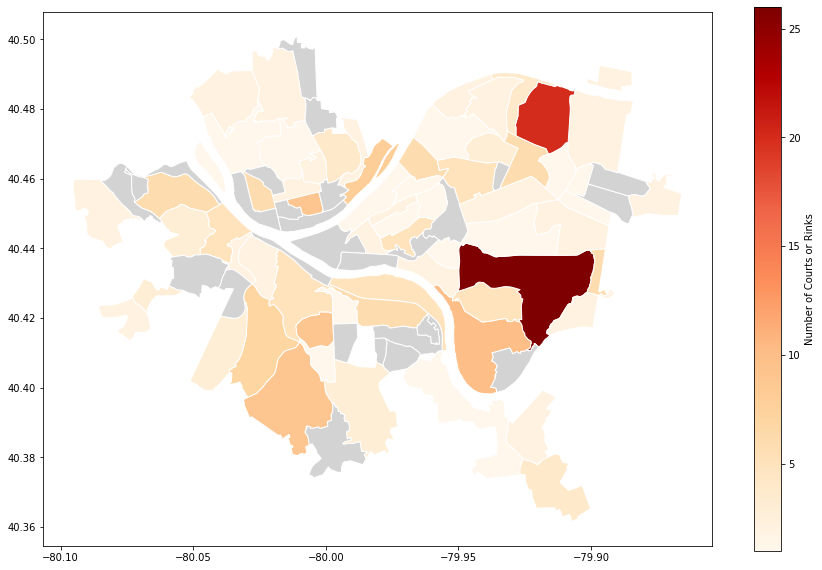

In [9]:
courtsandrinks_map.plot(column='id', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Courts or Rinks"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

In [10]:
sort_neighboorhoods = data_neighborhood.sort_values(ascending= False)
sort_neighboorhoods

neighborhood
Squirrel Hill South    26
Highland Park          20
Hazelwood              10
Beltzhoover             9
Brookline               9
                       ..
Perry South             1
Middle Hill             1
Marshall-Shadeland      1
Larimer                 1
Polish Hill             1
Name: id, Length: 63, dtype: int64

### Conclusion 
Looking at the map, it can be infered that the neighborhoods with the most courts and rinks in them are 
* Squirel Hill South
* Highland Park
* Hazelwood

I found that the best neighborhood for outdoor and indoor recreation is Squirrel Hill South. It has the most courts and rinks out of all of the neighborhoods. Suirrel Hill South has by far the most courts and rinks, with it having 26. The next closest is Highland Park with 20, but after that, the rest of the neighborhoods all have less than 10.  

# 
### Harshini's Notebook

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
%matplotlib inline

In [2]:
data = pd.read_csv("Pools.csv")
data.head()

print("Number of pools in each neighborhood:")
number_pools = data.groupby("neighborhood")['id'].count()
#prints the number of pools in each neighborhood
number_pools

Number of pools in each neighborhood:


neighborhood
Allegheny Center            1
Banksville                  1
Bedford Dwellings           1
Beechview                   1
Beltzhoover                 1
Bloomfield                  1
Brighton Heights            1
Brookline                   1
Carrick                     1
East Hills                  1
Greenfield                  1
Hazelwood                   1
Highland Park               2
Homewood South              1
Lincoln Place               1
Lincoln-Lemington-Belmar    1
Mount Washington            1
Perry North                 1
Polish Hill                 1
Shadyside                   1
Sheraden                    1
South Side Flats            2
South Side Slopes           1
Squirrel Hill South         1
Troy Hill                   1
Westwood                    1
Name: id, dtype: int64

In [3]:
#prints the maximum number of pools a neighboorhood has
max_value = number_pools.max()
print("Maximum number of pools a neighborhood has: ")
max_value

Maximum number of pools a neighborhood has: 


2

In [4]:
print("Number of each type of pool:")
number_type = data.groupby("type")['id'].count()
number_type

Number of each type of pool:


type
Pool          20
Spray Park     8
Name: id, dtype: int64

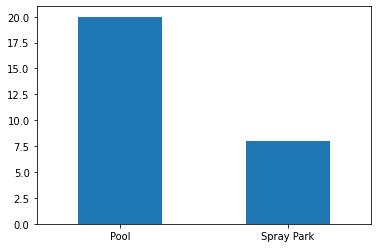

In [5]:
#graph to compare the number of neighboorhoods that have a type of pool
data["type"].value_counts().sort_index().plot(kind='bar', rot=0)

In [6]:
print("Number of each water source company:")
source_type = data.groupby("water_source")['id'].count()
source_type

Number of each water source company:


water_source
Pennsylvania American Water              8
Pittsburgh Water and Sewer Authority    19
Wilkinsburg Penn                         1
Name: id, dtype: int64

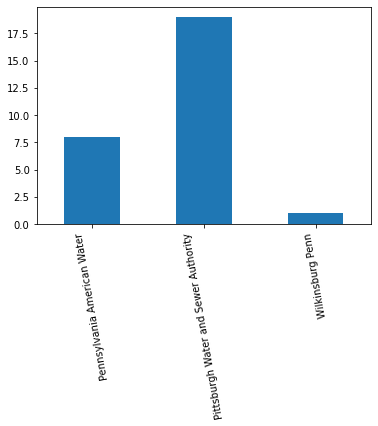

In [7]:
data["water_source"].value_counts().sort_index().plot(kind='bar', rot=100)

In [8]:
print(data[['neighborhood', 'capacity']])
max_v = data['capacity'].max()
max_v
max_index = data[['capacity']].idxmax()
print("\nNeighborhood with the largest capacity: ")
data.iloc[max_index, 7]

                neighborhood  capacity
0          Bedford Dwellings  538000.0
1                 Banksville  166320.0
2                  Beechview       NaN
3                 Bloomfield  335000.0
4                  Hazelwood       NaN
5                  Troy Hill       NaN
6                 East Hills       NaN
7              Highland Park       NaN
8              Highland Park  560242.0
9             Homewood South  171075.0
10          Brighton Heights  205800.0
11                Greenfield  195000.0
12             Lincoln Place   18000.0
13                 Shadyside       NaN
14                 Brookline  417657.0
15          South Side Flats  107000.0
16          South Side Flats  205800.0
17                   Carrick  224100.0
18          Mount Washington  356000.0
19               Perry North  205800.0
20       Squirrel Hill South  187600.0
21                  Sheraden  278000.0
22          Allegheny Center  271000.0
23               Beltzhoover       NaN
24               Polish H

8    Highland Park
Name: neighborhood, dtype: object

In [9]:
#most common water source and pool types
water_data = data['water_source'] == "Pittsburgh Water and Sewer Authority"
pool_data =  data['type'] == "Pool"
water_pool = data[water_data & pool_data]
water_pool
print(water_pool[['type', 'water_source', 'neighborhood']])

    type                          water_source         neighborhood
0   Pool  Pittsburgh Water and Sewer Authority    Bedford Dwellings
3   Pool  Pittsburgh Water and Sewer Authority           Bloomfield
7   Pool  Pittsburgh Water and Sewer Authority        Highland Park
8   Pool  Pittsburgh Water and Sewer Authority        Highland Park
9   Pool  Pittsburgh Water and Sewer Authority       Homewood South
10  Pool  Pittsburgh Water and Sewer Authority     Brighton Heights
11  Pool  Pittsburgh Water and Sewer Authority           Greenfield
16  Pool  Pittsburgh Water and Sewer Authority     South Side Flats
17  Pool  Pittsburgh Water and Sewer Authority              Carrick
18  Pool  Pittsburgh Water and Sewer Authority     Mount Washington
19  Pool  Pittsburgh Water and Sewer Authority          Perry North
20  Pool  Pittsburgh Water and Sewer Authority  Squirrel Hill South
22  Pool  Pittsburgh Water and Sewer Authority     Allegheny Center
24  Pool  Pittsburgh Water and Sewer Authority  

# 
### Chiamaka's Notebook

## Playground Dataset assessment

### Our project defines a good neigbourhood as one with a fun environment. An area that provides the most recreational facilities. A metric we would be using is the amount of playgrounds available in that neighbourhood. 

![playground](https://media.giphy.com/media/3o7aCPbznb29hgOgG4/giphy.gif)

### So first we are going use the imports that are necessary for our evaluation and visualization of the Playgrounds dataset provided by the WPRDC : 
https://data.wprdc.org/dataset/pgh/resource/8ac5c768-09ba-43a8-829f-ce4a417d20fb

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [6]:
# helps to display all the colums and rows 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

data = pd.read_csv("Playgroud.csv")
data.head(10)

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064
5,230731204,Arlington Playground,NaN,Parks - Southern,Arlington Park,FERNLEAF ST,https://tools.wprdc.org/images/pittsburgh/play...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418094,-79.975429
6,420573029,Armstrong Playground,NaN,Parks - Southern,Armstrong Park,S 12TH ST,https://tools.wprdc.org/images/pittsburgh/play...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428165,-79.986121
7,113170092,Arsenal Playground,NaN,Parks - Northeast,Arsenal Park,40TH ST,https://tools.wprdc.org/images/pittsburgh/play...,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466721,-79.961520
8,2089697067,August WIlson Playground,NaN,Parks - Schenley,August Wilson Park,CLIFF ST,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.446510,-79.985968
9,2124405123,Banksville Playground,NaN,Parks - Western,Banksville Park,CRANE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Banksville,2,20,42003202300,5,20,6,4-9,40.414666,-80.039342


#### Above is a code cell containing the visualization of the playground dataset we will be using. 

#### We want to get an understanding of the dataset provided so I called data.info() to see what each column represented.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          125 non-null    int64  
 1   name                        125 non-null    object 
 2   type                        0 non-null      float64
 3   maintenance_responsibility  120 non-null    object 
 4   park                        123 non-null    object 
 5   street                      123 non-null    object 
 6   image                       118 non-null    object 
 7   neighborhood                125 non-null    object 
 8   council_district            125 non-null    int64  
 9   ward                        125 non-null    int64  
 10  tract                       125 non-null    int64  
 11  public_works_division       125 non-null    int64  
 12  pli_division                125 non-null    int64  
 13  police_zone                 125 non

## Number of playgrounds in each neighborhood:

In [9]:
plygrdnum = data.groupby("neighborhood")['id'].count()

plygrdnum.head(125)

neighborhood
Allegheny Center            4
Allentown                   1
Banksville                  1
Bedford Dwellings           1
Beechview                   5
Beltzhoover                 4
Bloomfield                  2
Bluff                       1
Bon Air                     1
Brighton Heights            2
Brookline                   2
Carrick                     3
Central Lawrenceville       1
Central Northside           2
Central Oakland             1
Crafton Heights             2
Crawford-Roberts            3
Duquesne Heights            1
East Allegheny              1
East Carnegie               1
East Liberty                3
Elliott                     3
Esplen                      1
Fairywood                   1
Fineview                    1
Garfield                    2
Greenfield                  2
Hays                        1
Hazelwood                   3
Highland Park               4
Homewood North              1
Homewood West               1
Larimer                    

The data above is a lot to sort through because it contains 125 items, so I created a value count of the neighborhoods that had the amount of playgrounds close to the number `8`.
###### 
### The neighborhoods with the highest amount of playgrounds: 

In [10]:
n = 8
highdata = data['neighborhood'].value_counts()[:n].index.tolist()
highdata

['Squirrel Hill South',
 'Beechview',
 'South Side Slopes',
 'Sheraden',
 'Allegheny Center',
 'Highland Park',
 'Beltzhoover',
 'Carrick']

#### To fully evaluate the neighborhoods with the most playgrounds we have to take the instance of population to count. So I made a bar graph of a list of the populations of these 8 neighborhoods to assess the amount of persons per acre based on a dataset provided by the WPRDC

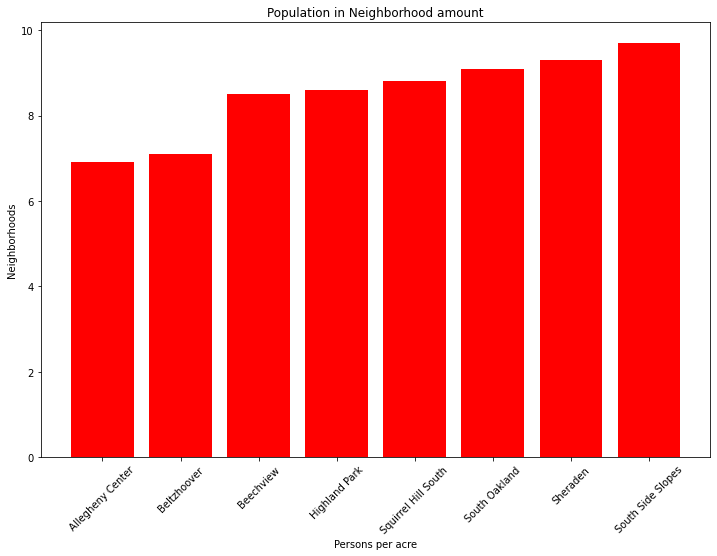

In [3]:
plt.figure(figsize=[12, 8])
#plt.rcParams["figure.autolayout"] = False
df = pd.DataFrame(dict(name=['Squirrel Hill South',
 'South Side Slopes',
 'Beechview',
 'Sheraden',
 'Allegheny Center',
 'Highland Park',
 'Beltzhoover',
 'South Oakland'],popnum=[8.8, 9.7, 8.5, 9.3, 6.9, 8.6, 7.1, 9.1]))

df_sorted = df.sort_values('popnum')
plt.bar('name', 'popnum', data=df_sorted, color='red')

plt.title("Population in Neighborhood amount")
plt.xlabel("Persons per acre")
plt.ylabel("Neighborhoods")
plt.xticks(rotation=45)

plt.savefig('2BarPlot.png')
# Displaying the bar plot
plt.show()

#### With this information, we can conclude that the population did not fully corelate with how the amount of playgorund would change because Squirrel Hill South is not close to the highest yet it has the most amount of playgorunds leading to happy fun time. And less people to be crowded in the playgrounds.
### If there are more playgorunds in the area, the less fights for who gets the swing set and the happier parents get. 

## Graph of the Neighborhoods with the most playgrounds


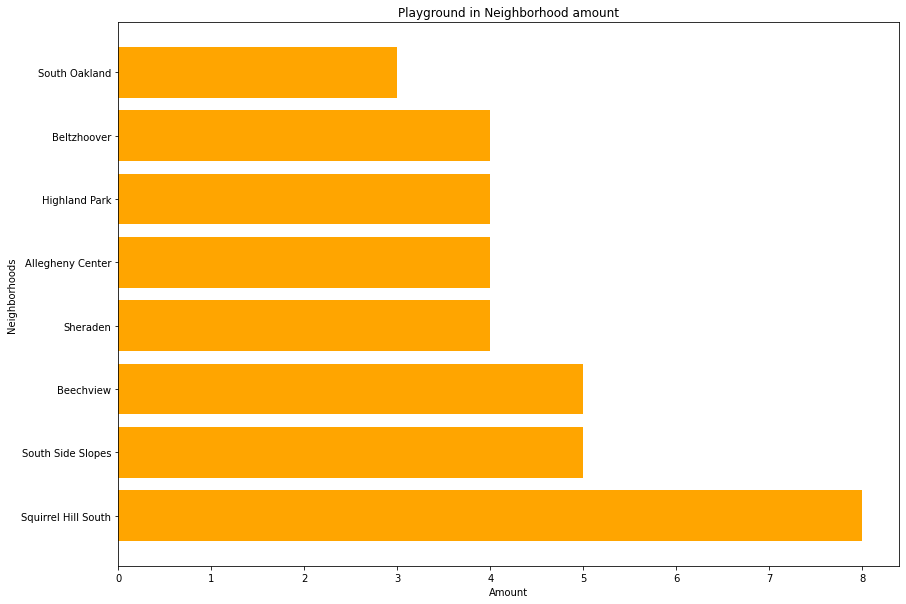

In [4]:
#Horizontal bar graph
plt.figure(figsize=[14, 10])
plt.barh(['Squirrel Hill South',
 'South Side Slopes',
 'Beechview',
 'Sheraden',
 'Allegheny Center',
 'Highland Park',
 'Beltzhoover',
 'South Oakland'], [8, 5, 5, 4, 4, 4, 4, 3], data=sorted, color='orange')
plt.title("Playground in Neighborhood amount")
plt.xlabel("Amount")
plt.ylabel("Neighborhoods")

plt.savefig('2BarPlot.png')
# Displaying the bar plot
plt.show() 

#### The Horizontal bar graph grasps the amount of playgrounds in each neighborhood shown in the y-axis. In the x-axis, the amount of playgrounds is displayed. In conclusion, the neighborhood with the most playgrounds is the Squirrel Hill South neighborhood with the amount of 8 playgorunds. Although this assessment does not include the evaluation of the population of these neighborhoods, my conclusion still posses as a valid statement because we are mainly focused on the amount of available recreational facilities in each neighborhoods.  
### - Thus, the best neighborhood in the Pittsburgh area to reside in aspect of playgrounds.
# 

# Final Conclusion

#### Combining the main metric values:

<Figure size 144000x56880 with 0 Axes>

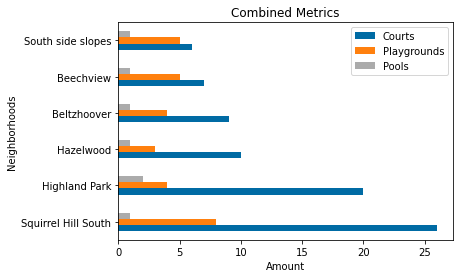

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=[2000, 790])   
data = {'Courts': [26, 20, 10, 9, 7, 6],
        'Playgrounds': [8, 4, 3, 4, 5, 5],
        'Pools': [1, 2, 1, 1, 1, 1]
       }
df = pd.DataFrame(data,columns=['Courts','Playgrounds', 'Pools'], index = ["Squirrel Hill South", "Highland Park", "Hazelwood", "Beltzhoover", "Beechview", "South side slopes"])

df.plot.barh()
plt.style.use('tableau-colorblind10')
plt.title('Combined Metrics')
plt.ylabel('Neighborhoods')
plt.xlabel('Amount')
plt.show()

## In order to make a final decision on the best neighborhood in Pittsburgh, we all compared what we individually chose as the best neighborhood based on our individual datasets. Looking at all of our findings, we concluded that the best neighborhood in Pittsburgh is Squirel Hill South. It has by far the most courts and rinks, as well as the most playgrounds. It doesn't have the most pools or the highest capacity, but it still has a pool. Overall Squirel Hill South was the best neighborhood out of all of them. It has 26 courts and rinks, 8 playgrounds, and a pool. It is a great neighborhood for outdoor and indoor recreation.

# Individual conclusions
   * Lucy: I have not been in Pittsburgh for very long. However, so far I would say my favorite neighborhood is Larimer since that is where Target is located. I make weekend trips to Target pretty frequently. This does not line up with what I chose as the best neighborhood based on my metric though. Larimer was not even close to the top. The best neighborhood I decided was Squirrel Hill South. There were the most courts and rinks in this neighborhood. 
   * Harshini: Highland Park was my best neighborhood because it had the highest number of pools, which was 2. It also had the highest pool capacity out of all of the neighborhoods. Furthermore, after looking at the bar graphs, I found that the pool was the most popular type, and the Pittsburgh Water and Sewer Authority was the most popular water source. Highland Park was also included in the data with both those popular type and water source. Therefore, Highland Park is the best neighborhood after analyzing the pools data set.
   * Chiamaka: I really do not know much about Pittsburgh so I went in this project with no bias, however I have explored around and I do like Southside and Squirrel Hill because it had nice shops around and the only African restaurant. Surprisingly, Our metric concluded that Squirrel Hill South is the best neighborhood for fun.